# Wiener Filter

In [6]:
from skimage import color, data, restoration
import scipy.fftpack as fp
#from skimage.measure import compare_psnr
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [7]:
def convolve2d(im, psf, k):
  M, N = im.shape
  freq = fp.fft2(im)
  psf = np.pad(psf, (((M-k)//2, (M-k)//2+1), ((N-k)//2, (N-k)//2+1)), 'constant')
  freq_kernel = fp.fft2(fp.ifftshift(psf))
  return np.abs(fp.ifft2(freq * freq_kernel))

In [8]:
def plot_freq_filter(F, title, size=20):
  plt.imshow(20*np.log10(0.01 + np.abs(fp.fftshift(F))), cmap='coolwarm')
  plt.title(title, size=size)
  plt.colorbar()

In [21]:
def plot_freq_spec_3d(freq):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(projection='3d')
  Y = np.arange(-freq.shape[0]//2, freq.shape[0]-freq.shape[0]//2)
  X = np.arange(-freq.shape[1]//2, freq.shape[1]-freq.shape[1]//2)
  X, Y = np.meshgrid(X, Y)
  Z = (20*np.log10(0.01 + np.abs(freq))).real
  surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, linewidth=0, antialiased=True)
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
  plt.show()

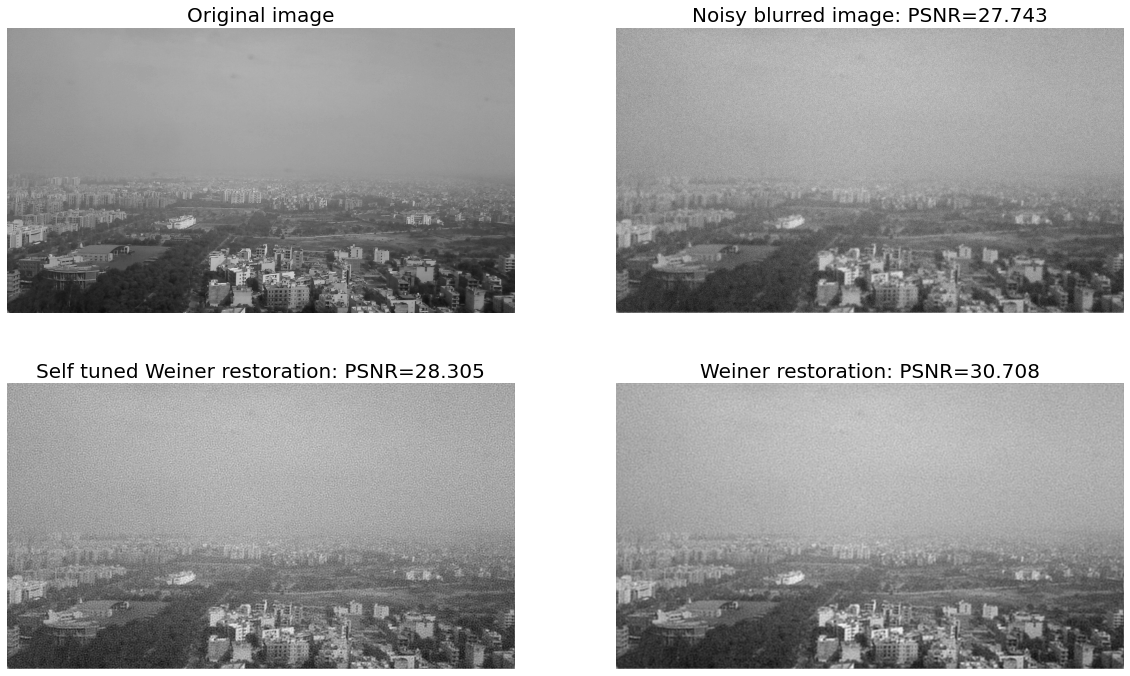

In [12]:
im = color.rgb2gray(imread('imagenes/earth_from_sky.png'))
k = 5
psf = np.ones((k, k)) / (k**2)
im1 = convolve2d(im, psf, k)
im1 += 0.3 * im.std() * np.random.standard_normal(im.shape)
im2, _ = restoration.unsupervised_wiener(im1, psf)
im3 = restoration.wiener(im1, psf, balance=0.25)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), sharex=True, sharey=True)
plt.gray()

axes[0, 0].imshow(im), axes[0, 0].axis('off'), axes[0, 0].set_title('Original image', size=20)

axes[0, 1].imshow(im1), axes[0, 1].axis('off')
axes[0, 1].set_title(f'Noisy blurred image: PSNR={psnr(im, im1):0.3f}', size=20)

axes[1, 0].imshow(im2), axes[1, 0].axis('off')
axes[1, 0].set_title(f'Self tuned Weiner restoration: PSNR={psnr(im, im2):0.3f}', size=20)

axes[1, 1].imshow(im3), axes[1, 1].axis('off')
axes[1, 1].set_title(f'Weiner restoration: PSNR={psnr(im, im3):0.3f}', size=20)
plt.show()

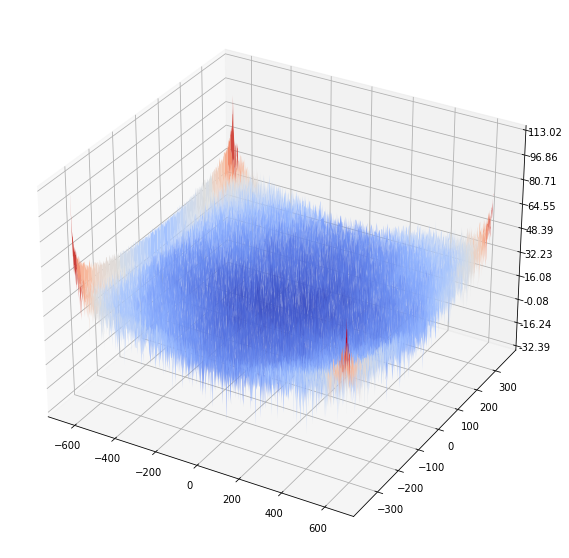

In [22]:
plot_freq_spec_3d(fp.fft2(im))

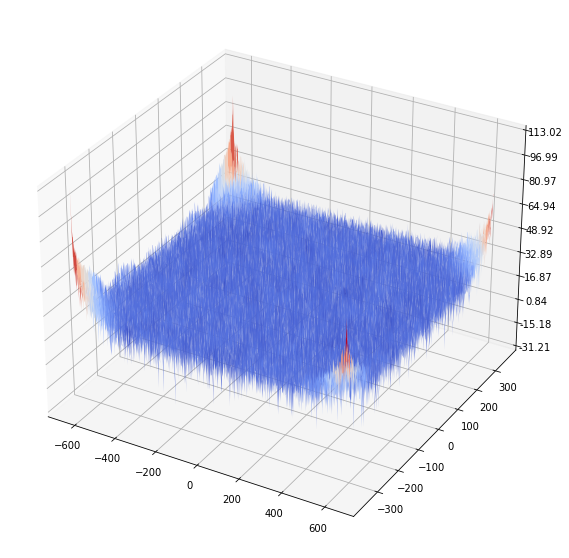

In [23]:
plot_freq_spec_3d(fp.fft2(im1))

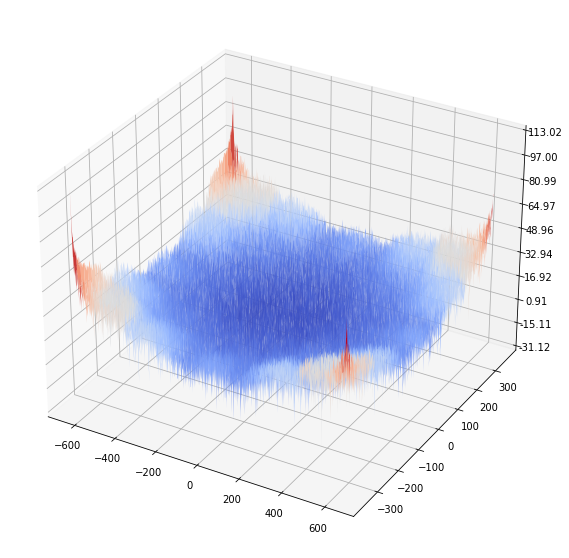

In [24]:
plot_freq_spec_3d(fp.fft2(im2))

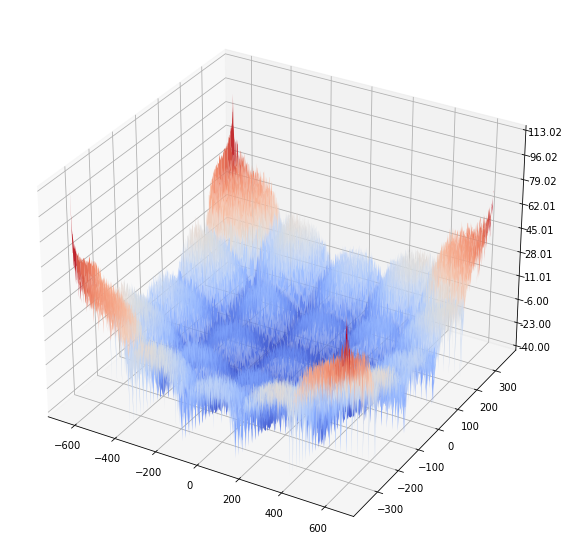

In [25]:
plot_freq_spec_3d(fp.fft2(im3))